
*Импорт библиотек*


In [ ]:
import tensorflow as tf
from tensorflow import keras

# импортируем библиотеку pathlib, а также функцию Path для работы с директориями
import pathlib
from pathlib import Path
import os
# для упорядочивания файлов в директории
import natsort

# библиотеки для работы с изображениями
import cv2
from PIL import Image
import matplotlib.pyplot as plt

# -- Импорт для подготовки данных: --
# модуль для предварительной обработки изображений
from tensorflow.keras.preprocessing import image
# Класс ImageDataGenerator - для генерации новых изображений на основе имеющихся
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# -- Импорт для построения модели: --
# импорт слоев нейросети
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
# импорт модели
from tensorflow.keras.models import Sequential
# импорт оптимайзера
from tensorflow.keras.optimizers import RMSprop

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#%cd /content/drive/My Drive/Dataset/

/content/drive/My Drive/Dataset


In [ ]:
import zipfile

In [ ]:
file = '/content/drive/My Drive/Dataset/mf-dataset.zip'
with zipfile.ZipFile(file, mode='r') as archive:
  archive.extractall()

In [ ]:
base_path = '/content/Male and Female face dataset/'
woman_path = '/content/Male and Female face dataset/Female Faces'
men_path = '/content/Male and Female face dataset/Male Faces'

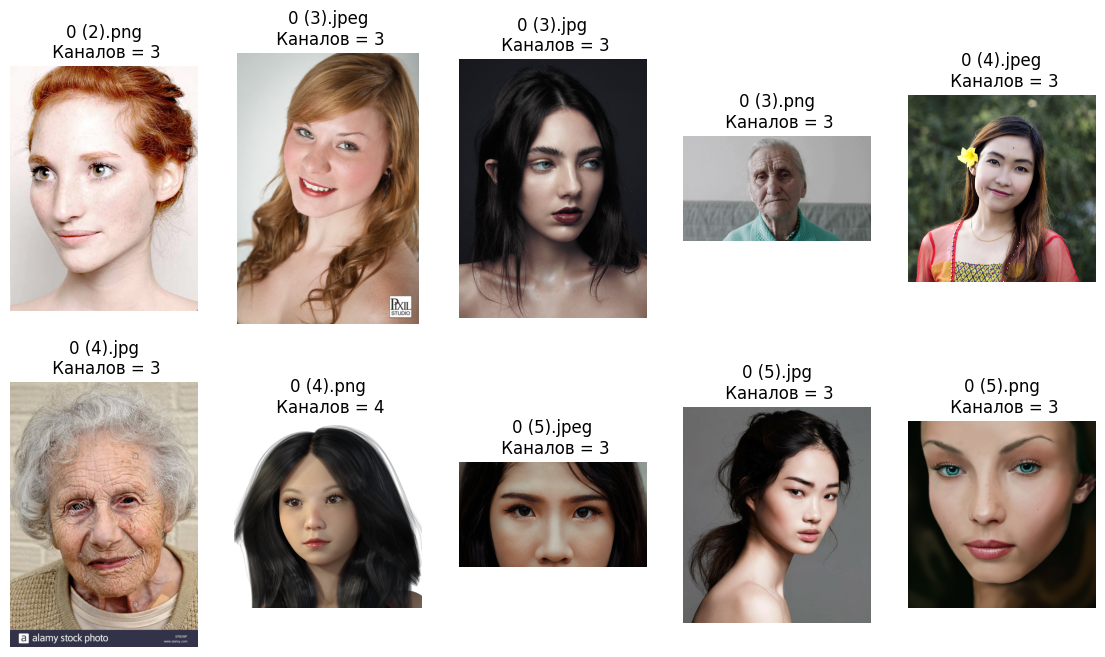

In [ ]:
# Получим и отсортируем список с названиями фото с женскими лицами
woman_filenames = os.listdir(woman_path)
woman_filenames = natsort.natsorted(woman_filenames)

# Получим и отсортируем список с названиями фото с мужскими лицами
men_filenames = os.listdir(men_path)
men_filenames = natsort.natsorted(men_filenames)

# -- Выведем часть фотографий (с 5 по 15) на экран:
#1. создаем график(фигуру) для вывода всех фото
pic_box = plt.figure(figsize=(14,12))
for i, image_name in enumerate(woman_filenames[5:15]):
    #2. считываем текущее изображение
    image = plt.imread(str(Path(woman_path, image_name)))
    #3. создаем "подграфик" для вывода текущего изображения в заданной позиции
    ax = pic_box.add_subplot(3,5,i+1)
    #4. в качестве названия графика определяем имя фотографии и число каналов
    ax.set_title(str(image_name) + '\n Каналов = ' + str(image.shape[2]))
    #5. выводим изображение на экран
    plt.imshow(image)
    #6. отключаем вывод осей графика
    plt.axis('off')
plt.show()

In [ ]:
for img in woman_filenames:
    im = Image.open(Path(woman_path,img))
    # Если расширение файла ".png" и формат файла "PNG":
    if (img[-3:].lower()=='png' and im.format is 'PNG'):
        # если режим изображения не RGBA (без альфа-канала):
        if im.mode is not 'RGBA':
            # конвертируем фото в RGBA и сохраняем в той же директории под тем же именем
            im.convert("RGBA").save(Path(woman_path, img))
            # при желании, можно вывести имена файлов, которые были переформатированы.
            print(img)

<>:4: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:6: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:4: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:6: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-7-9f9ef99318b5>:4: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if (img[-3:].lower()=='png' and im.format is 'PNG'):
<ipython-input-7-9f9ef99318b5>:6: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if im.mode is not 'RGBA':


0 (2).png
0 (3).png
0 (5).png
0 (7).png
0 (8).png
0 (9).png
0 (10).png
0 (15).png
0 (16).png
0 (17).png
0 (18).png
0 (19).png
0 (23).png
0 (26).png
0 (28).png
0 (29).png
0 (30).png
0 (31).png
0 (32).png
0 (34).png
0 (36).png
0 (37).png
0 (40).png
0 (42).png
0 (45).png
0 (46).png
0 (47).png
0 (48).png
0 (49).png
0 (52).png
0 (54).png
0 (55).png
0 (57).png
0 (58).png
0 (59).png
0 (60).png
0 (63).png
0 (64).png
0 (66).png
0 (69).png
0 (70).png
0 (75).png
0 (78).png
0 (81).png
0 (82).png
0 (84).png
0 (85).png
0 (87).png
0 (89).png
0 (91).png
0 (92).png


In [ ]:
for img in os.listdir(men_path):
    im = Image.open(Path(men_path,img))
    # Если расширение файла ".png" и формат файла "PNG":
    if (img[-3:].lower()=='png' and im.format is 'PNG'):
        # если режим изображения не RGBA (без альфа-канала):
        if im.mode is not 'RGBA':
            # конвертируем фото в RGBA и сохраняем в той же директории под тем же именем
            im.convert("RGBA").save(Path(men_path, img))
            # при желании, можно вывести имена файлов, которые были переформатированы.
            print(img)

<>:4: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:6: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:4: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:6: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-8-4714d3d47cd8>:4: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if (img[-3:].lower()=='png' and im.format is 'PNG'):
<ipython-input-8-4714d3d47cd8>:6: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if im.mode is not 'RGBA':


1 (6).png
1 (19).png
1 (25).png
1 (5).png
1 (22).png
1 (18).png
1 (44).png
1 (27).png
1 (47).png
1 (29).png
1 (40).png
1 (51).png
1 (41).png
1 (20).png
1 (42).png
1 (50).png
1 (24).png
1 (26).png
1 (13).png
1 (14).png
1 (17).png
1 (3).png
1 (37).png
1 (49).png
1 (12).png
1 (23).png
1 (46).png


In [ ]:
!pip install split-folders

In [ ]:
import splitfolders

In [ ]:
splitfolders.ratio(base_path, 'faces_splited', ratio=(0.8, 0.15, 0.05), seed=18, group_prefix=None )


Copying files: 5418 files [00:08, 652.33 files/s] 


In [ ]:
# определим параметры нормализации данных
train = ImageDataGenerator(rescale=1/255)
val = ImageDataGenerator(rescale=1/255)

# сгенерируем нормализованные данные
train_data = train.flow_from_directory('faces_splited/train', target_size=(200,200),
                          class_mode='binary', batch_size = 3, shuffle=True)
val_data = val.flow_from_directory('faces_splited/val', target_size=(200,200),
                                  class_mode='binary', batch_size=3, shuffle=True)

Found 4334 images belonging to 2 classes.
Found 812 images belonging to 2 classes.


In [ ]:
# Определяем параметры аугментации
data_augmentation = keras.Sequential(
  [
    # Отражение по горизонтали
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(200, 200,3)),
    # Вращение на рандомное значение до 0.05
    layers.experimental.preprocessing.RandomRotation(0.05),
    # Меняем контрастность изображений
    layers.experimental.preprocessing.RandomContrast(0.23),
    # Изменяем размер
    layers.experimental.preprocessing.RandomZoom(0.2)
  ]
)

In [ ]:
model = Sequential([
    # добавим аугментацию данных
    data_augmentation,
    layers.Conv2D(16, (3,3), activation='selu', input_shape=(200,200,3)),
    layers.MaxPool2D(2,2),
    layers.Conv2D(32, (3,3), activation='selu'),
    layers.MaxPool2D(2,2),
    layers.Dropout(0.05),

    layers.Conv2D(64, (3,3), activation='selu'),
    layers.MaxPool2D(2,2),
    layers.Dropout(0.1),
    layers.Conv2D(128, (2,2), activation='selu'),
    layers.MaxPool2D(2,2),
    layers.Conv2D(256, (2,2), activation='selu'),
    layers.MaxPool2D(2,2),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(500, activation='selu'),

    layers.Dense(1, activation='sigmoid')
])

In [ ]:
# Файл для сохранения модели с лучшими параметрами
checkpoint_filepath = 'best_model_3.h5'
# Компиляция модели
model.compile(loss='binary_crossentropy',
            optimizer = RMSprop(lr=0.00024),
            #optimizer=tf.keras.optimizers.Adam(learning_rate=0.000244),
             metrics = ['binary_accuracy'])

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_binary_accuracy',
    mode='max',
    save_best_only=True)

# Тренировка модели
history = model.fit(train_data, batch_size=600, verbose=1, epochs= 3,
                    validation_data=val_data,
                   callbacks=[model_checkpoint_callback])

Epoch 1/3
1445/1445 [==============================] - 126s 85ms/step - loss: 1.4583 - binary_accuracy: 0.5865 - val_loss: 0.6500 - val_binary_accuracy: 0.6810
Epoch 2/3
1445/1445 [==============================] - 120s 83ms/step - loss: 0.7573 - binary_accuracy: 0.6802 - val_loss: 0.4541 - val_binary_accuracy: 0.7845
Epoch 3/3
1445/1445 [==============================] - 122s 84ms/step - loss: 0.6112 - binary_accuracy: 0.7467 - val_loss: 0.4222 - val_binary_accuracy: 0.8091


In [ ]:
image_path = '/content/faces_splited/test/Female Faces/0 (1019).jpg'

In [ ]:
# Классификация нового изображения
from tensorflow.keras.preprocessing import image

def classify_image(image_path):
    img = image.load_img(image_path, target_size=(200, 200))
    x = image.img_to_array(img)
    x = x / 255.0
    x = x.reshape((1, 200, 200, 3))
    pred = model.predict(x)
    print(pred)
    if pred[0][0] > 0.5:
        return 'men'
    else:
        return 'woman'

In [ ]:
# Пример использования функции classify_image для классификации новых изображений


predicted_class = classify_image(image_path)
print(str(image_path), f'Predicted Class: {predicted_class}')

1/1 [==============================] - 0s 252ms/step
[[0.02515546]]
/content/faces_splited/test/Female Faces/0 (1019).jpg Predicted Class: woman
